# 1. Import Libraries

##### All the libraries we need in this code for data analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# 2. Read dataset and check it

##### In this part, we read the data and check general information about it, such as empty rows or the format of each column.

In [2]:
df = pd.read_csv('cazooCarsDataset_clean.csv')
df

,Brand,Model,Year,Miles(k miles),Registration,Control,Fuel,Location,Price(£),EngineSize,Doors,Emission,ModelFull
0,Mitsubishi,Outlander,2009.0,120,2009 (9 reg),Manual,Diesel,"Bradford, Clayton",2795,2.0,5.0,Euro 4,DI-DC Warrior 4WD
1,Peugeot,107,2011.0,50,2011 (61 reg),Manual,Petrol,Sheffield,2495,1.0,5.0,Euro 5,12V Urban
2,Kia,Venga,2011.0,89,2011 (11 reg),Manual,Petrol,Sheffield,2495,1.4,5.0,Euro 5,3
3,SEAT,Leon,2008.0,125,2008 (8 reg),Manual,Diesel,Bradford,1500,2.0,5.0,NaN,16V TDI FR
4,BMW,3 Series,2013.0,116,2013 (13 reg),Auto,Diesel,Shipley,8695,2.0,5.0,Euro 5 (s/s),320d M Sport Touring Auto xDrive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6667,Kia,Sorento,2025.0,7,2025 (25 reg),Auto,Diesel,Burnley,45799,2.2,5.0,NaN,- CRDi 4 DCT
6668,BMW,3 Series,2014.0,116,2014 (64 reg),Manual,Diesel,Leigh,5975,2.0,4.0,Euro 5 (s/s),320d M Sport xDrive
6669,Audi,Q5,2014.0,133,2014 (64 reg),Auto,Diesel,Derby,7495,2.0,5.0,NaN,TDI Quattro S Line Plus S Tronic
6670,Nissan,Qashqai,2016.0,57,2016 (66 reg),Manual,Diesel,Warrington,9550,1.5,5.0,Euro 6 (s/s),dCi Tekna SUV Diesel Manual 2WD (110 ps)


#### Check info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6672 entries, 0 to 6671
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           6672 non-null   object 
 1   Model           6672 non-null   object 
 2   Year            6584 non-null   float64
 3   Miles(k miles)  6672 non-null   int64  
 4   Registration    6672 non-null   object 
 5   Control         6672 non-null   object 
 6   Fuel            6672 non-null   object 
 7   Location        6672 non-null   object 
 8   Price(£)        6672 non-null   int64  
 9   EngineSize      5795 non-null   float64
 10  Doors           6616 non-null   float64
 11  Emission        2761 non-null   object 
 12  ModelFull       6656 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 677.8+ KB


#### Check null

In [4]:
df.isnull().sum()

Brand                0
Model                0
Year                88
Miles(k miles)       0
Registration         0
Control              0
Fuel                 0
Location             0
Price(£)             0
EngineSize         877
Doors               56
Emission          3911
ModelFull           16
dtype: int64

# 3. Clean dataset

#### Null rows

In [33]:
df = df.dropna(subset=['Year', 'Doors', 'ModelFull'])
df['EngineSize'].fillna(df['EngineSize'].median(), inplace= True)
df['Emission'].fillna('Unknown', inplace= True)
df['Doors'] = df['Doors'].astype('Int64')
df['Year'] = df['Year'].astype('Int64')

C:\Users\MILAD\AppData\Local\Temp\ipykernel_16108\2329383641.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EngineSize'].fillna(df['EngineSize'].median(), inplace= True)
C:\Users\MILAD\AppData\Local\Temp\ipykernel_16108\2329383641.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [34]:
df.isnull().sum()

Brand             0
Model             0
Year              0
Miles(k miles)    0
Registration      0
Control           0
Fuel              0
Location          0
Price(£)          0
EngineSize        0
Doors             0
Emission          0
ModelFull         0
logPrice          0
dtype: int64

##### One of the most important tasks is to examine the dispersion of prices, which according to the chart does not have a normal distribution. Therefore, using logarithms, we approximate the prices to a normal bell-shaped distribution.

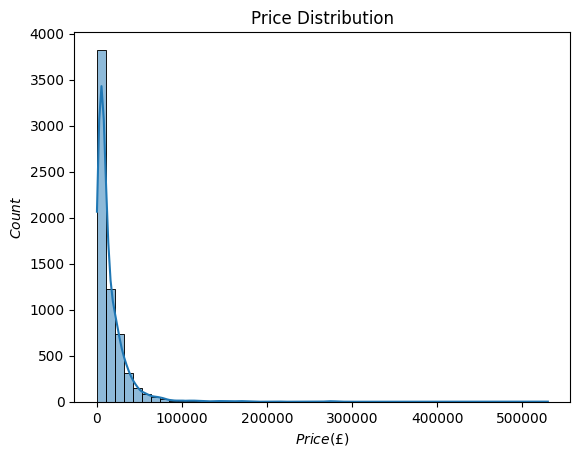

In [7]:
sns.histplot(df['Price(£)'], bins=50, kde=True)
plt.xlabel('$Price(£)$')
plt.ylabel('$Count$')
plt.title('Price Distribution')
plt.show()

In [8]:
df['logPrice'] = np.log1p(df['Price(£)'])

C:\Users\MILAD\AppData\Local\Temp\ipykernel_16108\1133997663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['logPrice'] = np.log1p(df['Price(£)'])


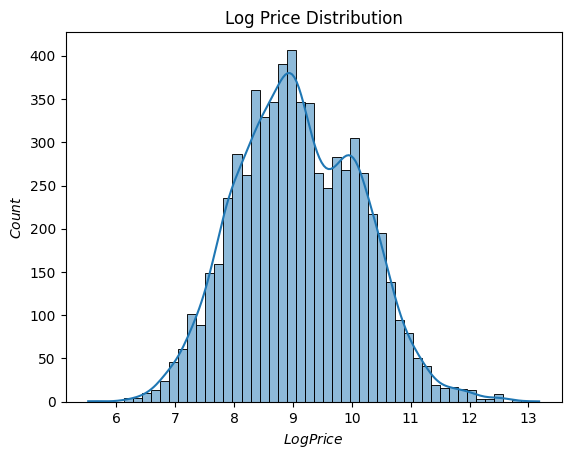

In [9]:
sns.histplot(df['logPrice'], bins= 50, kde= True)
plt.xlabel('$Log Price$')
plt.ylabel('$Count$')
plt.title('Log Price Distribution')
plt.show()

In [35]:
df.to_csv('finalCarDataset.csv', index= False)

# 4. Plot EDA

In [36]:
final_df = pd.read_csv('finalCarDataset.csv')
final_df.head()

,Brand,Model,Year,Miles(k miles),Registration,Control,Fuel,Location,Price(£),EngineSize,Doors,Emission,ModelFull,logPrice
0,Mitsubishi,Outlander,2009,120,2009 (9 reg),Manual,Diesel,"Bradford, Clayton",2795,2.0,5,Euro 4,DI-DC Warrior 4WD,7.935945
1,Peugeot,107,2011,50,2011 (61 reg),Manual,Petrol,Sheffield,2495,1.0,5,Euro 5,12V Urban,7.822445
2,Kia,Venga,2011,89,2011 (11 reg),Manual,Petrol,Sheffield,2495,1.4,5,Euro 5,3,7.822445
3,SEAT,Leon,2008,125,2008 (8 reg),Manual,Diesel,Bradford,1500,2.0,5,Unknown,16V TDI FR,7.313887
4,BMW,3 Series,2013,116,2013 (13 reg),Auto,Diesel,Shipley,8695,2.0,5,Euro 5 (s/s),320d M Sport Touring Auto xDrive,9.070618


In [37]:
final_df.isnull().sum()

Brand             0
Model             0
Year              0
Miles(k miles)    0
Registration      0
Control           0
Fuel              0
Location          0
Price(£)          0
EngineSize        0
Doors             0
Emission          0
ModelFull         0
logPrice          0
dtype: int64

In [38]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6518 entries, 0 to 6517
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           6518 non-null   object 
 1   Model           6518 non-null   object 
 2   Year            6518 non-null   int64  
 3   Miles(k miles)  6518 non-null   int64  
 4   Registration    6518 non-null   object 
 5   Control         6518 non-null   object 
 6   Fuel            6518 non-null   object 
 7   Location        6518 non-null   object 
 8   Price(£)        6518 non-null   int64  
 9   EngineSize      6518 non-null   float64
 10  Doors           6518 non-null   int64  
 11  Emission        6518 non-null   object 
 12  ModelFull       6518 non-null   object 
 13  logPrice        6518 non-null   float64
dtypes: float64(2), int64(4), object(8)
memory usage: 713.0+ KB


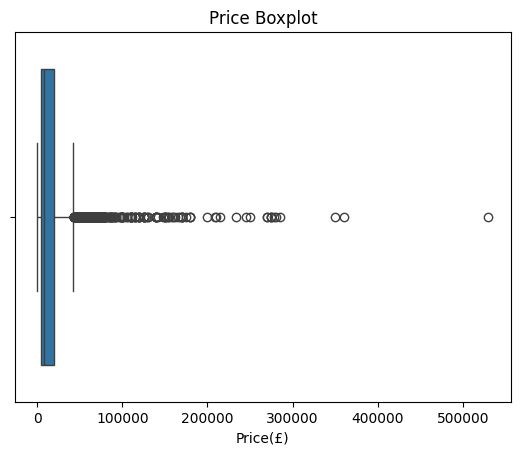

In [14]:
sns.boxplot(x= final_df['Price(£)'])
plt.title("Price Boxplot")
plt.show()

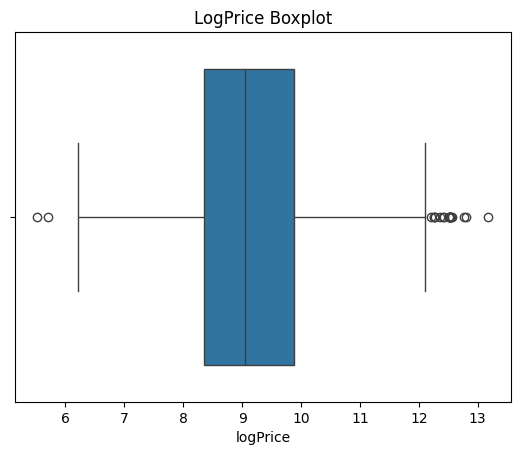

In [15]:
sns.boxplot(x= final_df['logPrice'])
plt.title("LogPrice Boxplot")
plt.show()

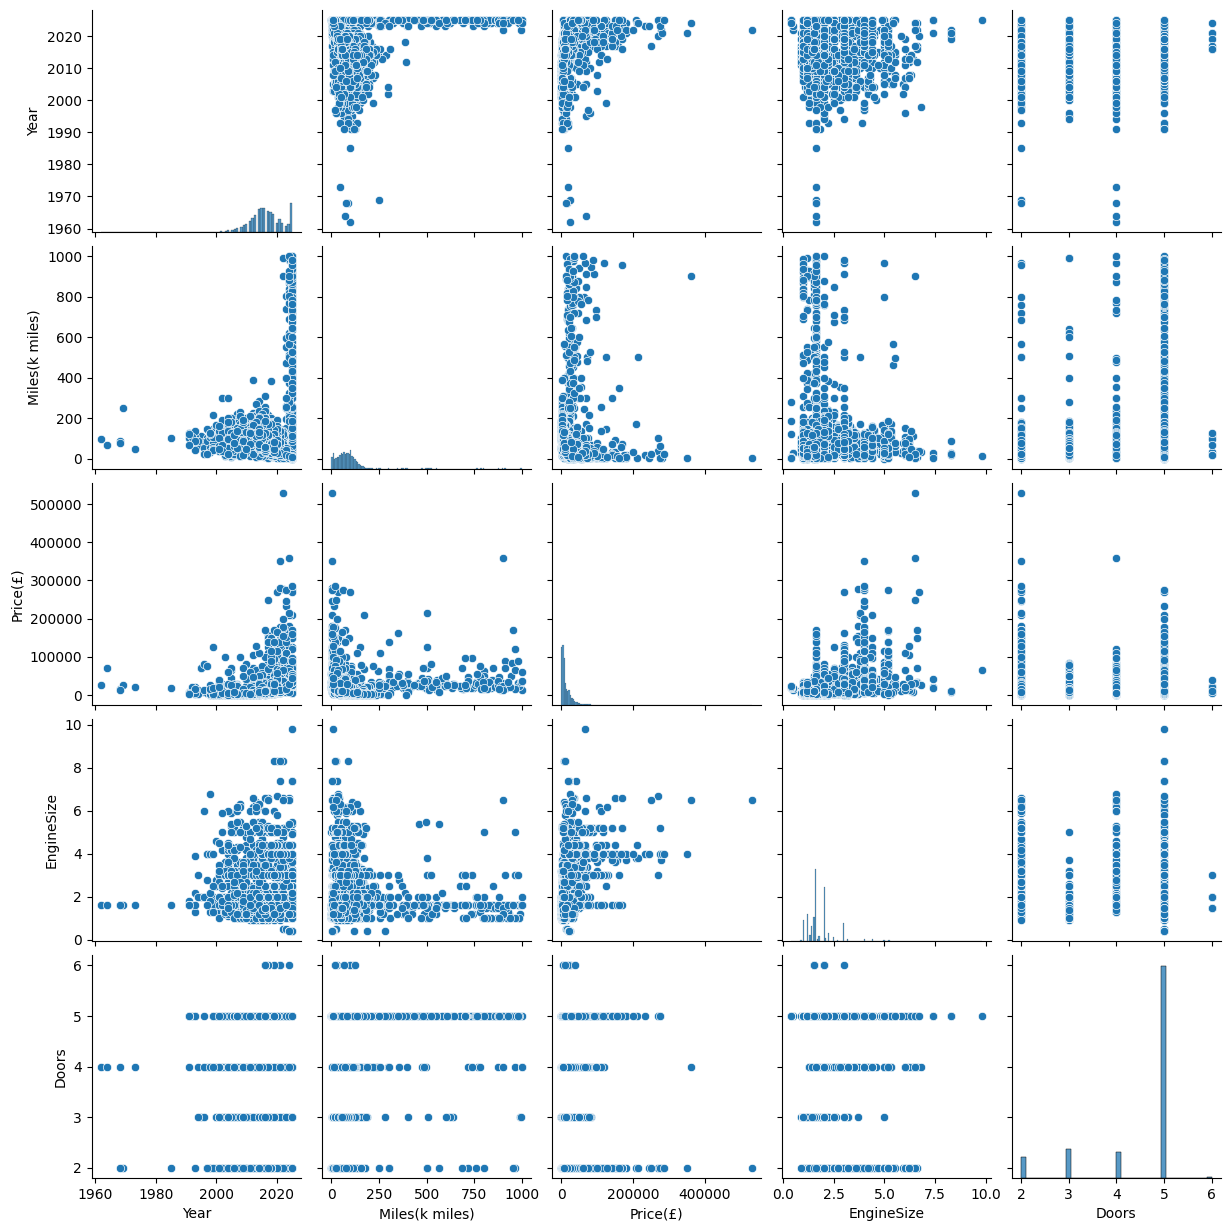

In [16]:
sns.pairplot(final_df[['Year', 'Miles(k miles)','Price(£)', 'EngineSize', 'Doors']])
plt.show()

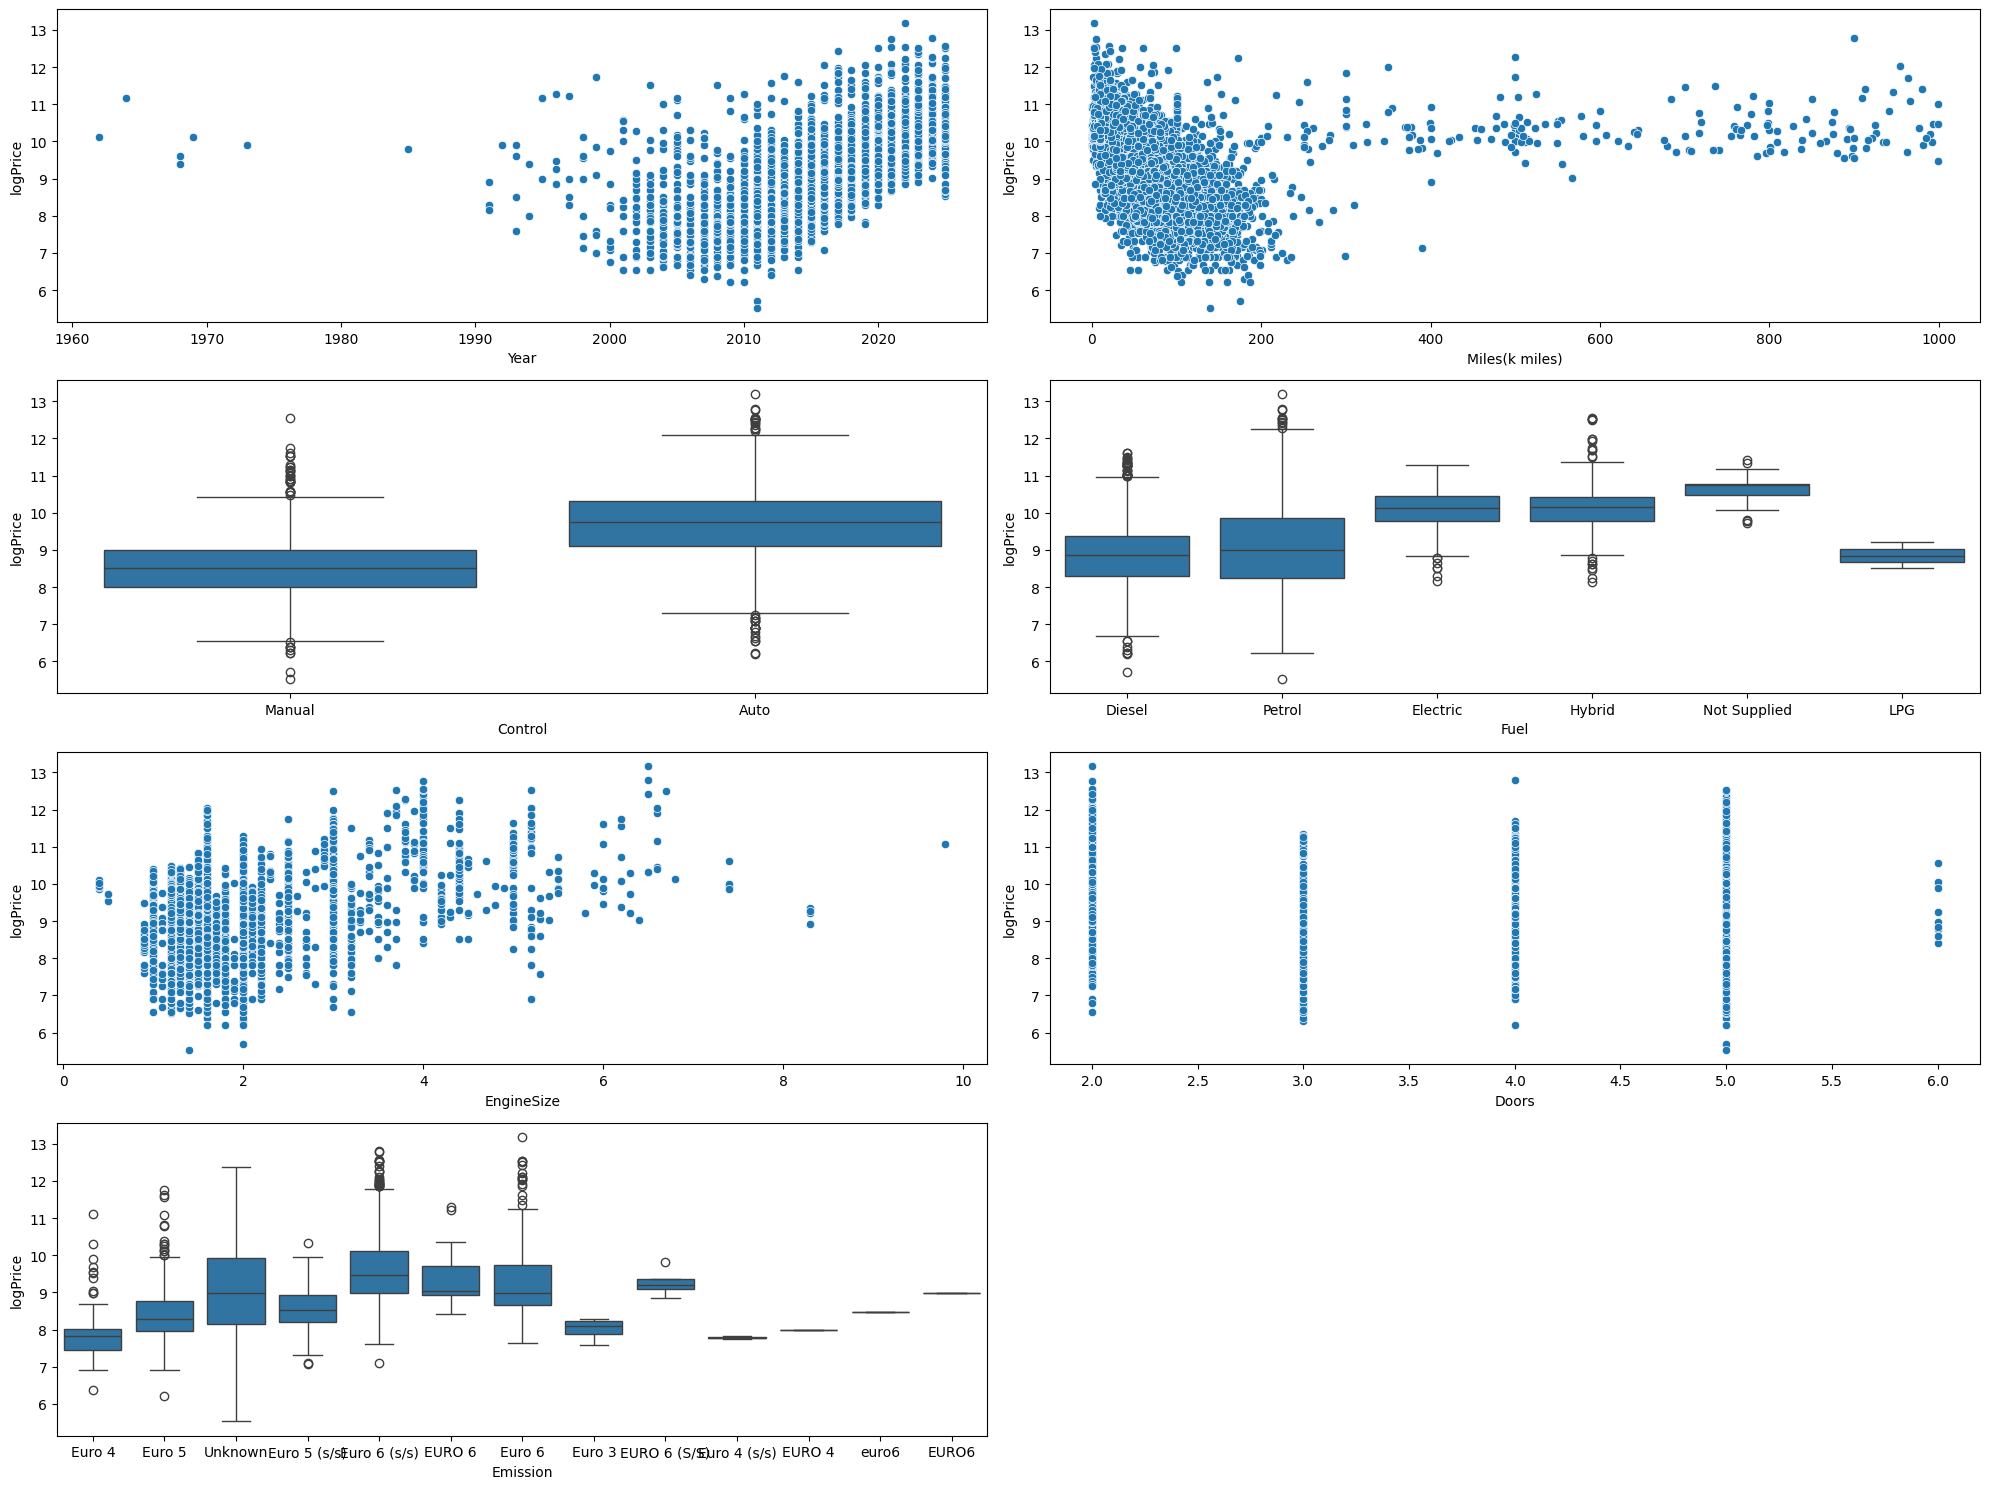

In [17]:
features = ['Year', 'Miles(k miles)', 'Control', 'Fuel', 'EngineSize', 'Doors', 'Emission']
plt.figure(figsize=(20, 15))

for i, feature in enumerate(features):
    plt.subplot(4, 2, i+1)
    if final_df[feature].dtype == 'object':
        sns.boxplot(data= final_df, x= feature, y='logPrice')
    else:
        sns.scatterplot(data= final_df, x=feature, y='logPrice')

plt.tight_layout()
plt.show()

# 5. Set ML models, comparison and choose best model

##### We analyze the data using several models. Considering the following models, we select the best model in terms of measurement criteria.

##### Split X, y

In [18]:
final_df.columns

Index(['Brand', 'Model', 'Year', 'Miles(k miles)', 'Registration', 'Control',
       'Fuel', 'Location', 'Price(£)', 'EngineSize', 'Doors', 'Emission',
       'ModelFull', 'logPrice'],
      dtype='object')

In [19]:
X = final_df.drop(columns=['Registration', 'Price(£)', 'ModelFull', 'logPrice'])
# [['Brand', 'Model', 'Year', 'Miles(k miles)', 'Registration', 'Control',
#        'Fuel', 'Location', 'EngineSize', 'Doors', 'Emission']]
y = final_df['logPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

##### Function for pipeline

In [20]:
def pipe_model(model):
    categorical_features = ['Brand', 'Model', 'Control','Fuel', 'Location', 'Emission']
       
    categorical_transforemer = OneHotEncoder(handle_unknown='ignore')

    numerical_features = ['Year', 'Miles(k miles)', 'EngineSize', 'Doors']
    numerical_transformer = StandardScaler()

    preprocessor = ColumnTransformer([
        ('cat', categorical_transforemer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

    regression_model = Pipeline(steps=[
        ('preprocessing', preprocessor),
        ('regressor', model)
    ])

    return regression_model


##### Function for GridSearch

In [21]:
def grid_search_model(model, param_grid, X_train, y_train, cv, scoring):
    pipeline = pipe_model(model)
    grid_search = GridSearchCV(
        estimator= pipeline,
        param_grid= param_grid,
        cv= cv,
        scoring= scoring,
        n_jobs= -1
    )

    grid_search.fit(X_train, y_train)

    return grid_search

##### Function for metrics

In [22]:
def calculate_metrics(model_name, y_prediction_train, y_prediction_test):
    mae_train = np.exp(mean_absolute_error(y_train, y_prediction_train))
    mae_test = np.exp(mean_absolute_error(y_test, y_prediction_test))
    mse_train = np.exp(mean_squared_error(y_train, y_prediction_train))
    mse_test = np.exp(mean_squared_error(y_test, y_prediction_test))
    r2_train = r2_score(y_train, y_prediction_train)
    r2_test = r2_score(y_test, y_prediction_test)

    print(f'Metrics for {model_name}: ')
    print(f'MAE train = {mae_train}\nMAE test = {mae_test}')
    print(f'MSE train = {mse_train}\nMSE test = {mse_test}')
    print(f'R2 Score train = {r2_train}\nR2 Score test = {r2_test}')

    return  mae_test, mse_test, r2_test

#### Linear Model

In [23]:
linear_model = pipe_model(LinearRegression())
linear_model.fit(X_train, y_train)
y_prediction_train_linear = linear_model.predict(X_train)
y_prediction_test_linear = linear_model.predict(X_test)

lin_test_mae, lin_test_mse, lin_test_r2 = calculate_metrics('LinearRegression', y_prediction_train_linear, y_prediction_test_linear)

Metrics for LinearRegression: 
MAE train = 1.2514697725626058
MAE test = 1.3094919907162281
MSE train = 1.1163526393020162
MSE test = 1.1445103562890842
R2 Score train = 0.8966175089506958
R2 Score test = 0.8812526826484354


In [23]:
# Grid Search
# params = {
#     'regressor__fit_intercept': [True, False],
#     'regressor__copy_X': [True, False],
#     'regressor__n_jobs': [-1, 1],
#     'regressor__positive': [True, False]
# }

# linear_grid = grid_search_model(LinearRegression(), params, X_train, y_train, cv= 2, scoring='r2')
# print(f'Best Scores for Linear Regression:\nBest Params: {linear_grid.best_params_}\nBest Score: {linear_grid.best_score_}')

#### Decision Tree Model

In [24]:
dt_model = pipe_model(DecisionTreeRegressor(max_depth=16, max_leaf_nodes=32, min_samples_leaf=4, min_samples_split=2, random_state=123))
dt_model.fit(X_train, y_train)
y_prediction_train_dt = dt_model.predict(X_train)
y_prediction_test_dt = dt_model.predict(X_test)

dt_test_mae, dt_test_mse, dt_test_r2 = calculate_metrics('Decision Tree Regression', y_prediction_train_dt, y_prediction_test_dt)

Metrics for Decision Tree Regression: 
MAE train = 1.4270390139436615
MAE test = 1.4255006613850847
MSE train = 1.2538707267622091
MSE test = 1.274134397845671
R2 Score train = 0.787503824459606
R2 Score test = 0.786863087961534


In [25]:
# Grid Search Decision Tree
# params_dt = {
#     'regressor__splitter': ['best', 'random'],
#     'regressor__max_depth': [8, 16, 32],
#     'regressor__min_samples_split': [2, 4],
#     'regressor__min_samples_leaf': [1, 2, 4],
#     'regressor__max_leaf_nodes': [8, 16, 32]
# }

# dt_grid = grid_search_model(DecisionTreeRegressor(), params_dt, X_train, y_train, cv= 2, scoring='r2')
# print(f'Best Scores for Linear Regression:\nBest Params: {dt_grid.best_params_}\nBest Score: {dt_grid.best_score_}')

#### Random Forest Model

In [25]:
#  ========= Best Model =========  #

rf_model = pipe_model(RandomForestRegressor(n_estimators=300, max_depth=18, random_state=123))
rf_model.fit(X_train, y_train)
y_prediction_train_rf = rf_model.predict(X_train)
y_prediction_test_rf = rf_model.predict(X_test)

rf_test_mae, rf_test_mse, rf_test_r2 = calculate_metrics('Random Forest Regression', y_prediction_train_rf, y_prediction_test_rf)

Metrics for Random Forest Regression: 
MAE train = 1.1239818706997757
MAE test = 1.2557955773388683
MSE train = 1.026470999433083
MSE test = 1.1167147911853168
R2 Score train = 0.9754599580662359
R2 Score test = 0.9028822533930781


In [27]:
# Grid Search Random Forest
# params_rf = {
#     'regressor__n_estimators': [100, 150, 300],
#     'regressor__max_depth': [8, 16, 32],
#     'regressor__min_samples_split': [2, 4],
#     'regressor__min_samples_leaf': [1, 2, 4, 8],
#     'regressor__max_leaf_nodes': [8, 16, 32]
# }

# rf_grid = grid_search_model(RandomForestRegressor(), params_rf, X_train, y_train, cv= 2, scoring='r2')
# print(f'Best Scores for Linear Regression:\nBest Params: {rf_grid.best_params_}\nBest Score: {rf_grid.best_score_}')

#### XGB Model

In [26]:
xgb_model = pipe_model(xg.XGBRFRegressor(objective='reg:linear', n_estimators = 10, seed = 123))
xgb_model.fit(X_train, y_train)
y_prediction_train_xgb = xgb_model.predict(X_train)
y_prediction_test_xgb = xgb_model.predict(X_test)

xgb_test_mae, xgb_test_mse, xgb_test_r2 = calculate_metrics('XGBRegression', y_prediction_train_xgb, y_prediction_test_xgb)

d:\PROGRAMMING_PROJECTS\Github Projects\3.WebScaping and Predict Car Price\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:13:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:245: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)


Metrics for XGBRegression: 
MAE train = 1.3634294149098836
MAE test = 1.3664017803615374
MSE train = 1.1945972188596412
MSE test = 1.2115090875284533
R2 Score train = 0.8329891931660677
R2 Score test = 0.8312032520107275


##### We plotted all three main metrics, MAE , MSE and R^2, for each model in a bar chart. As can be seen, the best model is the one with the highest R^2 and the lowest MAE and MSE. According to the chart below, the best model for this data is linear regression.

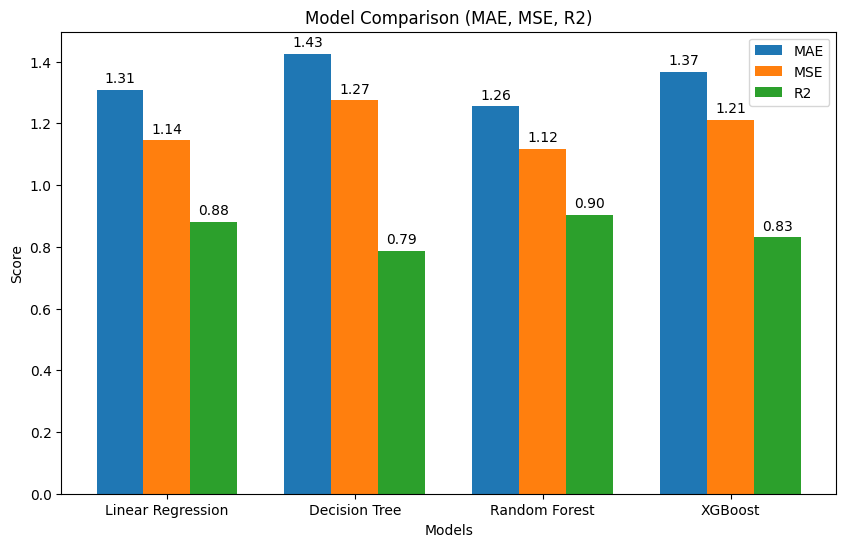

In [27]:
results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'MAE': [lin_test_mae, dt_test_mae, rf_test_mae, xgb_test_mae],
    'MSE': [lin_test_mse, dt_test_mse, rf_test_mse, xgb_test_mse],
    'R2': [lin_test_r2, dt_test_r2, rf_test_r2, xgb_test_r2]
}

df_plot = pd.DataFrame(results)

metrics = ['MAE', 'MSE', 'R2']
x = np.arange(len(df_plot['Model']))
width = 0.25

fig, ax = plt.subplots(figsize=(10,6))

bars = []
for i, metric in enumerate(metrics):
    bar = ax.bar(x + i*width, df_plot[metric], width, label=metric)
    bars.append(bar)
    ax.bar_label(bar, padding=3, fmt='%.2f')

ax.set_xlabel("Models")
ax.set_ylabel("Score")
ax.set_title("Model Comparison (MAE, MSE, R2)")
ax.set_xticks(x + width)
ax.set_xticklabels(df_plot['Model'])
ax.legend()

plt.show()


# 6. Predict and comparison with real-data

In [ ]:
# Real Price of this car in website = £14,795
my_car_page101 = pd.DataFrame([{
    'Brand': 'BMW',
    'Model': 'X2',
    'Year': 2018,
    'Miles(k miles)': 79,
    'Control': 'Auto',
    'Fuel': 'Diesel',
    'Location': 'Dukinfield',
    'EngineSize': 2.0,
    'Doors': 4,
    'Emission': 'Euro 6 (s/s)'
}])

lin_price = np.expm1(linear_model.predict(my_car_page101))
dt_price = np.expm1(dt_model.predict(my_car_page101))
rf_price = np.expm1(rf_model.predict(my_car_page101))
xgb_price = np.expm1(xgb_model.predict(my_car_page101))

print('Real Price: £14,795')
print(f'Price in Linaer Model: £{lin_price}')
print(f'Price in DecisionTree Model: £{dt_price}')
print(f'Price in RandomForest Model: £{rf_price}')
print(f'Price in XGB Model: £{xgb_price}')

Real Price: £14,795
Price in Linaer Model: £[16938.63536899]
Price in DecisionTree Model: £[17648.95977054]
Price in RandomForest Model: £[15661.47355824]
Price in XGB Model: £[17217.314]


In [ ]:
# Real Price of this car in website = £4,995
my_car_page1 = pd.DataFrame([{
    'Brand': 'Mercedes-Benz',
    'Model': 'E-Class',
    'Year': 2012,
    'Miles(k miles)': 113,
    'Control': 'Auto',
    'Fuel': 'Diesel',
    'Location': 'oldham',
    'EngineSize': 2.1,
    'Doors': 2,
    'Emission': 'Euro 5 (s/s)'
}])

lin_price2 = np.expm1(linear_model.predict(my_car_page1))
dt_price2 = np.expm1(dt_model.predict(my_car_page1))
rf_price2 = np.expm1(rf_model.predict(my_car_page1))
xgb_price2 = np.expm1(xgb_model.predict(my_car_page1))

print('Real Price: £4,995')
print(f'Price in Linaer Model: £{lin_price2}')
print(f'Price in DecisionTree Model: £{dt_price2}')
print(f'Price in RandomForest Model: £{rf_price2}')
print(f'Price in XGB Model: £{xgb_price2}')

Real Price: £4,995
Price in Linaer Model: £[7752.34584531]
Price in DecisionTree Model: £[6116.87635155]
Price in RandomForest Model: £[4801.24012594]
Price in XGB Model: £[4857.0337]


In [ ]:
# Real Price of this car in website = £16,950
my_car_page3 = pd.DataFrame([{
    'Brand': 'Audi',
    'Model': 'A3',
    'Year': 2023,
    'Miles(k miles)': 82,
    'Control': 'Manual',
    'Fuel': 'Petrol',
    'Location': 'Bolton',
    'EngineSize': 1.0,
    'Doors': 4,
    'Emission': 'Euro 6 (s/s)'
}])

lin_price3 = np.expm1(linear_model.predict(my_car_page3))
dt_price3 = np.expm1(dt_model.predict(my_car_page3))
rf_price3 = np.expm1(rf_model.predict(my_car_page3))
xgb_price3 = np.expm1(xgb_model.predict(my_car_page3))

print('Real Price: £16,950')
print(f'Price in Linaer Model: £{lin_price3}')
print(f'Price in DecisionTree Model: £{dt_price3}')
print(f'Price in RandomForest Model: £{rf_price3}')
print(f'Price in XGB Model: £{xgb_price3}')

Real Price: £16,950
Price in Linaer Model: £[20640.88929549]
Price in DecisionTree Model: £[20286.96219385]
Price in RandomForest Model: £[11473.77457058]
Price in XGB Model: £[12235.692]


In [ ]:
# Real Price of this car in website = £30,990
my_car_page4 = pd.DataFrame([{
    'Brand': 'Vauxhall',
    'Model': 'Mokka',
    'Year': 2025,
    'Miles(k miles)': 10,
    'Control': 'Auto',
    'Fuel': 'Electric',
    'Location': 'J. C. Halliday Citroen Eglinton',
    'EngineSize': 0.0,
    'Doors': 5,
    'Emission': 'Unknown'
}])

lin_price4 = np.expm1(linear_model.predict(my_car_page4))
dt_price4 = np.expm1(dt_model.predict(my_car_page4))
rf_price4 = np.expm1(rf_model.predict(my_car_page4))
xgb_price4 = np.expm1(xgb_model.predict(my_car_page4))

print('Real Price: £30,990')
print(f'Price in Linaer Model: £{lin_price4}')
print(f'Price in DecisionTree Model: £{dt_price4}')
print(f'Price in RandomForest Model: £{rf_price4}') 
print(f'Price in XGB Model: £{xgb_price4}')

Real Price: £30,990
Price in Linaer Model: £[19430.82715781]
Price in DecisionTree Model: £[21480.77891055]
Price in RandomForest Model: £[21030.98433761]
Price in XGB Model: £[21769.514]


In [ ]:
# Real Price of this car in website = £15,499
my_car_page5 = pd.DataFrame([{
    'Brand': 'Hyundai',
    'Model': 'KONA',
    'Year': 2020,
    'Miles(k miles)': 31.329,
    'Control': 'Auto',
    'Fuel': 'Hybrid',
    'Location': 'Widnes',
    'EngineSize': 1.6,
    'Doors': 5,
    'Emission': 'Unknown'
}])

lin_price5 = np.expm1(linear_model.predict(my_car_page5))
dt_price5 = np.expm1(dt_model.predict(my_car_page5))
rf_price5 = np.expm1(rf_model.predict(my_car_page5))
xgb_price5 = np.expm1(xgb_model.predict(my_car_page5))

print('Real Price: £15,499')
print(f'Price in Linaer Model: £{lin_price5}')
print(f'Price in DecisionTree Model: £{dt_price5}')
print(f'Price in RandomForest Model: £{rf_price5}')
print(f'Price in XGB Model: £{xgb_price5}')

Real Price: £15,499
Price in Linaer Model: £[17866.2343486]
Price in DecisionTree Model: £[17648.95977054]
Price in RandomForest Model: £[19129.5191009]
Price in XGB Model: £[18620.414]
